In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv("Property_train.csv")
test_df = pd.read_csv("Property_test_share.csv")

In [5]:
test = test_df.copy()

In [7]:
train_df

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,...,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,...,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,...,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,...,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,...,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62030,1,DPIW,15110.0,3/31/2010,1PUV,8745,CAT3,missing,missing,13468.0,...,A,10012.0,9D54,WHITE,CA,87562,2006,A,4,11162.0
62031,0,YOC7,9456.0,10/20/2010,RRJQ,5360,OTHER,B,missing,8543.0,...,A,5439.0,E75G,GOLD,TN,80201,2007,B,3,6147.0
62032,1,CNKZ,8730.0,5/19/2009,ZCI3,6670,CAT3,A,missing,7217.0,...,A,6219.0,UA42,MAROON,IN,65983,2005,A,4,7620.0
62033,0,RELA,8546.0,4/30/2009,X7IX,6600,CAT1,A,missing,7316.0,...,A,6311.0,ASW2,SILVER,TX,59780,2006,A,3,7450.0


<Axes: xlabel='NormalisedPopulation', ylabel='Density'>

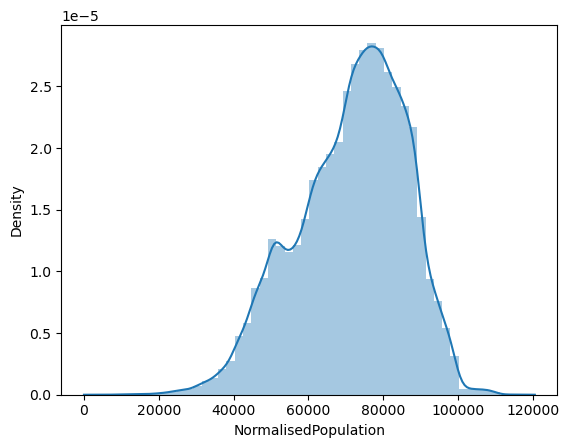

In [9]:
import seaborn as sns

sns.distplot(train_df['NormalisedPopulation'])

<Axes: >

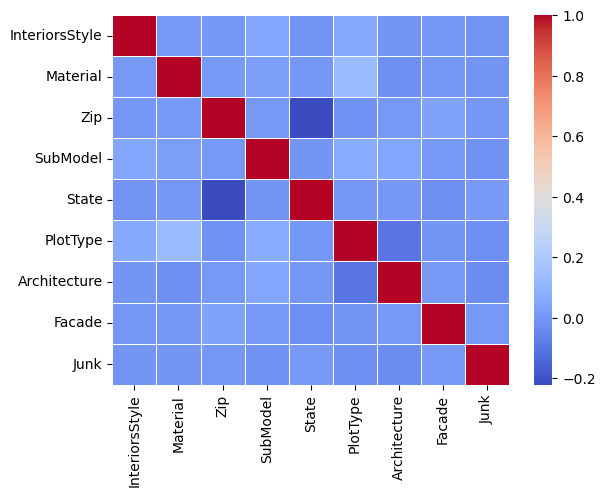

In [11]:
# Since there are many categorical columns with much cardinality
# check Kendall's tau correlation coefficients to analyze relationships between categorical columns with high cardinality

from scipy.stats import kendalltau

def check_relation(df, cat_columns):
    arr = []
    for i in range(len(cat_columns)):
        col = []
        for j in range(len(cat_columns)):
            corr, p = kendalltau(df[cat_columns[i]], df[cat_columns[j]])
            col.append(corr)
        arr.append(col)
    corr = pd.DataFrame(arr, columns=cat_columns, index=cat_columns)
    return corr

cat_list = ['InteriorsStyle', 'Material', 'Zip', 'SubModel', 'State', 'PlotType', 'Architecture', 'Facade','Junk']

corr = check_relation(train_df, cat_list)

sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)

In [13]:
train_df.isnull().sum()

Junk                     0
InteriorsStyle           0
PriceIndex8              0
ListDate                 0
Material                 0
PriceIndex9              0
Agency                   0
AreaIncomeType           0
EnvRating                0
PriceIndex7              0
ExpeditedListing         0
PriceIndex4              0
PriceIndex1              0
PriceIndex6              0
PRIMEUNIT                0
Channel                  0
Zip                      0
InsurancePremiumIndex    0
PlotType                 0
Architecture             0
PriceIndex3              0
Region                   0
PriceIndex5              0
SubModel                 0
Facade                   0
State                    0
NormalisedPopulation     0
BuildYear                0
RegionType               0
PropertyAge              0
PriceIndex2              0
dtype: int64

In [15]:
# we can see the missing values are in dataframe are not np.nan but a string 'missing'

train_df.isin(['missing']).sum()

Junk                         0
InteriorsStyle               0
PriceIndex8                272
ListDate                     0
Material                     0
PriceIndex9                  0
Agency                       5
AreaIncomeType            2676
EnvRating                59092
PriceIndex7                272
ExpeditedListing             0
PriceIndex4                 14
PriceIndex1                 14
PriceIndex6                272
PRIMEUNIT                59092
Channel                      0
Zip                          0
InsurancePremiumIndex        0
PlotType                     0
Architecture                 0
PriceIndex3                 14
Region                       6
PriceIndex5                272
SubModel                     0
Facade                       5
State                        0
NormalisedPopulation         0
BuildYear                    0
RegionType                   5
PropertyAge                  0
PriceIndex2                 14
dtype: int64

In [17]:
# Since there are many Price_index colunms so lets take them and fill the NAN values with mean of that column

columns=['PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4', 'PriceIndex5', 'PriceIndex6', 'PriceIndex7', 'PriceIndex8','PriceIndex9']

for i in columns:
    train_df[i] = train_df[i].replace('missing', pd.NA)
    test_df[i] = test_df[i].replace('missing', pd.NA)
    
    train_df[i] = pd.to_numeric(train_df[i])
    test_df[i] = pd.to_numeric(test_df[i])
    mean_price = train_df[i].mean()
    
    train_df[i] = train_df[i].fillna(mean_price)
    test_df[i] = test_df[i].fillna(mean_price)


In [19]:
# Combining all price columns with replacing with one column only which contains median prices of each row to reduce dimensionality 

import pandas as pd

columns=['PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4', 'PriceIndex5', 'PriceIndex6', 'PriceIndex7', 'PriceIndex8','PriceIndex9']

train_df[columns] = train_df[columns].apply(pd.to_numeric)
median_values_train = train_df[columns].median(axis=1)
train_df.drop(columns=columns, inplace=True)
train_df['PriceIndex0'] = median_values_train

test_df[columns] = test_df[columns].apply(pd.to_numeric)
median_values_test = test_df[columns].median(axis=1)
test_df.drop(columns=columns, inplace=True)
test_df['PriceIndex0'] = median_values_test

train_df


,Junk,InteriorsStyle,ListDate,Material,Agency,AreaIncomeType,EnvRating,ExpeditedListing,PRIMEUNIT,Channel,...,Architecture,Region,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex0
0,0,6LLJ,9/7/2010,UT7W,CAT3,B,missing,0,missing,Direct,...,I3Z9,A,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,1/7/2009,PRN0,CAT2,B,missing,0,missing,Direct,...,AVYP,A,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,6/23/2010,A9RA,CAT1,B,missing,0,missing,Other,...,1M5X,A,4K0H,SILVER,SC,94514,2004,A,6,5900.0
3,0,MK2K,3/19/2009,RRJQ,OTHER,A,missing,0,missing,Agent,...,DKOO,A,ZLXY,WHITE,NC,82302,2002,C,7,6305.0
4,0,GK4G,3/3/2010,HE5A,OTHER,B,missing,0,missing,Other,...,KML6,A,FIVQ,SILVER,SC,49176,2007,B,3,6400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62030,1,DPIW,3/31/2010,1PUV,CAT3,missing,missing,0,missing,Direct,...,I3Z9,A,9D54,WHITE,CA,87562,2006,A,4,11626.0
62031,0,YOC7,10/20/2010,RRJQ,OTHER,B,missing,0,missing,Direct,...,4GZ4,A,E75G,GOLD,TN,80201,2007,B,3,6683.0
62032,1,CNKZ,5/19/2009,ZCI3,CAT3,A,missing,0,missing,Direct,...,I3Z9,A,UA42,MAROON,IN,65983,2005,A,4,7217.0
62033,0,RELA,4/30/2009,X7IX,CAT1,A,missing,0,missing,Direct,...,YIK5,A,ASW2,SILVER,TX,59780,2006,A,3,7316.0


In [21]:
train_df.describe()

,Junk,ExpeditedListing,Zip,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex0
count,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.00000,62035.000000
mean,0.122544,0.024680,58038.149109,1277.286854,71462.694302,2005.347739,4.17171,7577.959288
std,0.327915,0.155148,26143.635828,600.787708,14583.079578,1.730014,1.70878,2597.496282
min,0.000000,0.000000,2764.000000,462.000000,4825.000000,2001.000000,0.00000,0.000000
25%,0.000000,0.000000,32124.000000,837.000000,61803.500000,2004.000000,3.00000,5706.000000
50%,0.000000,0.000000,73108.000000,1155.000000,73361.000000,2005.000000,4.00000,7536.000000
75%,0.000000,0.000000,80022.000000,1623.000000,82370.500000,2007.000000,5.00000,9126.500000
max,1.000000,1.000000,99224.000000,7498.000000,115717.000000,2010.000000,9.00000,36859.000000


In [23]:
# removing outliers

def remove_outliers(df, columns, lower_quantile=0.10, upper_quantile=0.90):
    for column in columns:
        lower_bound = df[column].quantile(lower_quantile)
        upper_bound = df[column].quantile(upper_quantile)
        mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
        df = df[mask]
    return df

columns_to_remove_outliers = ['PriceIndex0','InsurancePremiumIndex','NormalisedPopulation']
train_df = remove_outliers(train_df, columns_to_remove_outliers)

In [25]:
train_df=train_df.reset_index(drop=True)
train_df

,Junk,InteriorsStyle,ListDate,Material,Agency,AreaIncomeType,EnvRating,ExpeditedListing,PRIMEUNIT,Channel,...,Architecture,Region,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex0
0,0,MK2K,3/19/2009,RRJQ,OTHER,A,missing,0,missing,Agent,...,DKOO,A,ZLXY,WHITE,NC,82302,2002,C,7,6305.0
1,0,UN74,2/4/2009,PRN0,CAT3,A,missing,0,missing,Agent,...,STJH,A,EFZH,WHITE,AZ,80353,2005,A,4,8381.0
2,0,NMSK,11/1/2010,ARWN,CAT2,A,missing,0,missing,Other,...,K92H,A,WHBI,GREEN,CA,64674,2008,A,2,9538.0
3,0,K3BB,11/18/2010,4ZHP,CAT2,B,missing,0,missing,Agent,...,AVYP,A,FIVQ,WHITE,NC,68939,2005,A,5,5440.0
4,1,7CIG,10/14/2010,4VDP,OTHER,missing,missing,0,missing,Agent,...,RIAX,A,6E9G,RED,FL,64896,2006,B,4,8864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,0,XCOA,4/28/2009,WO6R,CAT2,A,missing,0,missing,Direct,...,TP7R,A,JFYD,SILVER,FL,86484,2005,A,4,9462.0
32293,0,7NL9,12/10/2009,MCPM,CAT1,B,missing,0,missing,Agent,...,7IYX,A,EW79,SILVER,FL,62927,2006,A,3,6187.0
32294,0,7R8J,10/6/2010,PRN0,CAT1,B,missing,0,missing,Other,...,YIK5,A,FIVQ,SILVER,NC,79157,2005,A,5,5333.0
32295,1,CNKZ,5/19/2009,ZCI3,CAT3,A,missing,0,missing,Direct,...,I3Z9,A,UA42,MAROON,IN,65983,2005,A,4,7217.0


In [27]:
# dropping unnecessary features which dont contribute much in Junk factor direct

train_df.drop(columns = ['ListDate', 'EnvRating', 'PRIMEUNIT','ExpeditedListing'],inplace=True)
test_df.drop(columns = ['ListDate', 'EnvRating', 'PRIMEUNIT','ExpeditedListing'],inplace=True)


In [29]:
# some columns has less missing values so we will replace them by closest value possible related to other columns

train_df['AreaIncomeType'] = train_df['AreaIncomeType'].replace('missing', pd.NA)

counts = train_df[train_df['AreaIncomeType'].isna()]['RegionType'].value_counts()

counts

RegionType
A        1142
B         126
C          58
OTHER       4
Name: count, dtype: int64

In [31]:
pd.crosstab(train_df['AreaIncomeType'],train_df['Region'])

Region,A,B,missing
AreaIncomeType,,,
A,15518,454,1
B,14264,406,0
C,297,27,0


In [33]:
train_df['Region'].value_counts()

Region
A          31404
B            890
missing        3
Name: count, dtype: int64

In [35]:
train_df['RegionType'].value_counts()

RegionType
A          28803
B           2344
C           1049
OTHER         98
missing        3
Name: count, dtype: int64

In [37]:
train_df['Agency'].value_counts()

Agency
CAT1       11715
CAT2       11586
CAT3        5502
OTHER       3491
missing        3
Name: count, dtype: int64

In [39]:
train_df['AreaIncomeType'] = train_df['AreaIncomeType'].fillna('B')
train_df['Region'] = train_df['Region'].replace('missing','A')
train_df['RegionType'] = train_df['RegionType'].replace('missing','A')
train_df['Agency'] = train_df['Agency'].replace('missing','A')

test_df['AreaIncomeType'] = test_df['AreaIncomeType'].fillna('B')
test_df['Region'] = test_df['Region'].replace('missing','A')
test_df['RegionType'] = test_df['RegionType'].replace('missing','A')
test_df['Agency'] = test_df['Agency'].replace('missing','A')

In [41]:
# Performing one-hot encoding and frequency encoding on categorical columns with high cardinality and dropping original columns

import pandas as pd

train_df['Train'] = 1
test_df['Train'] = 0

combined_df = pd.concat([train_df, test_df], ignore_index=True)

cat = ['Agency', 'AreaIncomeType', 'Channel', 'Region', 'RegionType']

combined_df = pd.get_dummies(combined_df, columns=cat)

# For columns with many unique values 
columns = ['InteriorsStyle', 'Material', 'Zip', 'SubModel', 'State', 'PlotType', 'Architecture', 'Facade']

train_df = combined_df[combined_df['Train'] == 1].drop(columns=['Train'])
test_df = combined_df[combined_df['Train'] == 0].drop(columns=['Train'])

for col in columns:
    freq_encoding = train_df[col].value_counts(normalize=True)
    train_df[col+'_freq'] = train_df[col].map(freq_encoding)
    
    freq_encoding_test = test_df[col].value_counts(normalize=True)
    test_df[col+'_freq'] = test_df[col].map(freq_encoding_test)
    
train_df.drop(columns=columns, inplace=True)
test_df.drop(columns=columns, inplace=True)

train_df


,Junk,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex0,Agency_A,Agency_CAT1,Agency_CAT2,Agency_CAT3,...,RegionType_C,RegionType_OTHER,InteriorsStyle_freq,Material_freq,Zip_freq,SubModel_freq,State_freq,PlotType_freq,Architecture_freq,Facade_freq
0,0.0,1933,82302,2002,7,6305.0,False,False,False,False,...,True,False,0.000062,0.019042,0.025018,0.000062,0.093321,0.075673,0.004397,0.163421
1,0.0,1503,80353,2005,4,8381.0,False,False,False,True,...,False,False,0.000310,0.202124,0.032294,0.001177,0.081587,0.036102,0.010125,0.163421
2,0.0,825,64674,2008,2,9538.0,False,False,True,False,...,False,False,0.001300,0.018547,0.005635,0.001084,0.104747,0.036102,0.021829,0.048271
3,0.0,1215,68939,2005,5,5440.0,False,False,True,False,...,False,False,0.042171,0.040778,0.025018,0.201071,0.093321,0.434096,0.146206,0.163421
4,1.0,1313,64896,2006,4,8864.0,False,False,False,False,...,False,False,0.004985,0.004397,0.009815,0.009939,0.146020,0.434096,0.016658,0.081494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,0.0,1503,86484,2005,4,9462.0,False,False,True,False,...,False,False,0.005573,0.017246,0.013624,0.006874,0.146020,0.116853,0.190761,0.204508
32293,0.0,728,62927,2006,3,6187.0,False,True,False,False,...,False,False,0.014212,0.015234,0.009815,0.013685,0.146020,0.434096,0.032294,0.204508
32294,0.0,803,79157,2005,5,5333.0,False,True,False,False,...,False,False,0.022634,0.202124,0.007152,0.201071,0.093321,0.079048,0.255937,0.204508
32295,1.0,1313,65983,2005,4,7217.0,False,False,False,True,...,False,False,0.008453,0.127690,0.001548,0.051553,0.007183,0.134873,0.159086,0.027743


In [43]:
# Standard scaling the numerical columns 

from sklearn.preprocessing import StandardScaler

char_columns = ['InsurancePremiumIndex', 'BuildYear', 'PropertyAge', 'PriceIndex0','NormalisedPopulation']

scaler = StandardScaler()

train_df[char_columns] = scaler.fit_transform(train_df[char_columns])
test_df[char_columns] = scaler.transform(test_df[char_columns])

In [45]:
train_df

,Junk,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex0,Agency_A,Agency_CAT1,Agency_CAT2,Agency_CAT3,...,RegionType_C,RegionType_OTHER,InteriorsStyle_freq,Material_freq,Zip_freq,SubModel_freq,State_freq,PlotType_freq,Architecture_freq,Facade_freq
0,0.0,1.912847,1.231788,-2.343335,1.979731,-0.747439,False,False,False,False,...,True,False,0.000062,0.019042,0.025018,0.000062,0.093321,0.075673,0.004397,0.163421
1,0.0,0.757954,1.035438,-0.318741,-0.029067,0.495110,False,False,False,True,...,False,False,0.000310,0.202124,0.032294,0.001177,0.081587,0.036102,0.010125,0.163421
2,0.0,-1.063017,-0.544125,1.705853,-1.368265,1.187609,False,False,True,False,...,False,False,0.001300,0.018547,0.005635,0.001084,0.104747,0.036102,0.021829,0.048271
3,0.0,-0.015556,-0.114453,-0.318741,0.640532,-1.265167,False,False,True,False,...,False,False,0.042171,0.040778,0.025018,0.201071,0.093321,0.434096,0.146206,0.163421
4,1.0,0.247652,-0.521760,0.356123,-0.029067,0.784200,False,False,False,False,...,False,False,0.004985,0.004397,0.009815,0.009939,0.146020,0.434096,0.016658,0.081494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,0.0,0.757954,1.653098,-0.318741,-0.029067,1.142121,False,False,True,False,...,False,False,0.005573,0.017246,0.013624,0.006874,0.146020,0.116853,0.190761,0.204508
32293,0.0,-1.323539,-0.720125,0.356123,-0.698666,-0.818065,False,True,False,False,...,False,False,0.014212,0.015234,0.009815,0.013685,0.146020,0.434096,0.032294,0.204508
32294,0.0,-1.122104,0.914948,-0.318741,0.640532,-1.329210,False,True,False,False,...,False,False,0.022634,0.202124,0.007152,0.201071,0.093321,0.079048,0.255937,0.204508
32295,1.0,0.247652,-0.412251,-0.318741,-0.029067,-0.201579,False,False,False,True,...,False,False,0.008453,0.127690,0.001548,0.051553,0.007183,0.134873,0.159086,0.027743


In [47]:
round(train_df.Junk.value_counts(normalize=True)*100,2)

Junk
0.0    88.82
1.0    11.18
Name: proportion, dtype: float64

In [49]:
# upsampling the data of minority class and to reduce overfitting , lets reduce the length of new data added using "n_samples= len(majority_class)//2"

from sklearn.utils import resample

majority_class = train_df[train_df['Junk'] == 0]
minority_class = train_df[train_df['Junk'] == 1]

upsampled_minority_class = resample(minority_class, 
                                    replace=True,
                                    n_samples= len(majority_class)//2,
                                    random_state=42)

train_df = pd.concat([majority_class, upsampled_minority_class])

train_df['Junk'].value_counts()

Junk
0.0    28686
1.0    14343
Name: count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X = train_df.drop(columns=['Junk'])
y = train_df['Junk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator = rf_model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_s

In [53]:
best_params

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [55]:
from sklearn.metrics import accuracy_score , roc_auc_score

rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'AUC-ROC Score: {auc_roc:.2f}')

Accuracy: 0.92
AUC-ROC Score: 0.89


In [57]:
# predicting the probabilities of having junk and putting in back to the test dataframe which was created at start as a copy of test_df

test_df = test_df.reset_index(drop=True)

test_df = test_df.drop('Junk', axis=1)
test['Junk'] = rf_model.predict_proba(test_df)[:, 1].round(3)

test

,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,...,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,Junk
0,6LLJ,10645.0,9/22/2010,ZCI3,6015,CAT3,A,missing,9568.0,0,...,5911.0,UA42,BLUE,NC,67549,2006,A,4,8311.0,0.091
1,QD0H,9891.0,3/12/2010,RRJQ,7625,OTHER,A,missing,8888.0,0,...,5370.0,BUNS,BLUE,FL,56570,2004,B,6,7123.0,0.251
2,I7GR,8426.0,10/12/2009,ZCI3,6900,CAT2,B,missing,7911.0,0,...,6862.0,8YTZ,BLACK,OK,51840,2008,A,1,7994.0,0.110
3,5KS5,9269.0,5/20/2010,PRN0,6475,CAT1,B,missing,7773.0,0,...,4872.0,FIVQ,GREEN,CO,83300,2005,A,5,5259.0,0.097
4,918O,5366.0,1/13/2009,C8A4,3960,CAT1,A,missing,4134.0,0,...,3365.0,KT8F,BLACK,NC,95035,2003,A,6,4362.0,0.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,DYK9,13956.0,10/26/2009,PRN0,7500,CAT2,B,missing,12860.0,0,...,8879.0,DZ5Y,BLUE,OK,51629,2008,A,1,9181.0,0.292
10944,GK4G,7880.0,9/28/2010,HE5A,5425,OTHER,B,missing,6845.0,0,...,3594.0,6E9G,BLUE,TX,69990,2006,B,4,5185.0,0.179
10945,6LLJ,16417.0,11/18/2009,2NHM,7700,CAT3,A,missing,14663.0,0,...,10424.0,UTUM,GREY,VA,73737,2007,A,2,12088.0,0.092
10946,2XWO,11311.0,12/6/2010,NYFD,6300,CAT2,A,missing,10292.0,0,...,6755.0,Y29N,WHITE,NC,85960,2007,A,3,7978.0,0.272


In [59]:
#Saving the file 

test = test[['InteriorsStyle', 'Junk']]
test.to_csv('Project5_Submission.csv', index=False)